In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_prediction_dataset.csv')
#print("Number of rows in the dataset: ", df.head(5).shape[0])  # Display the first 5 rows
#df_subset = df.head(10000)
#print("done")

<Axes: >

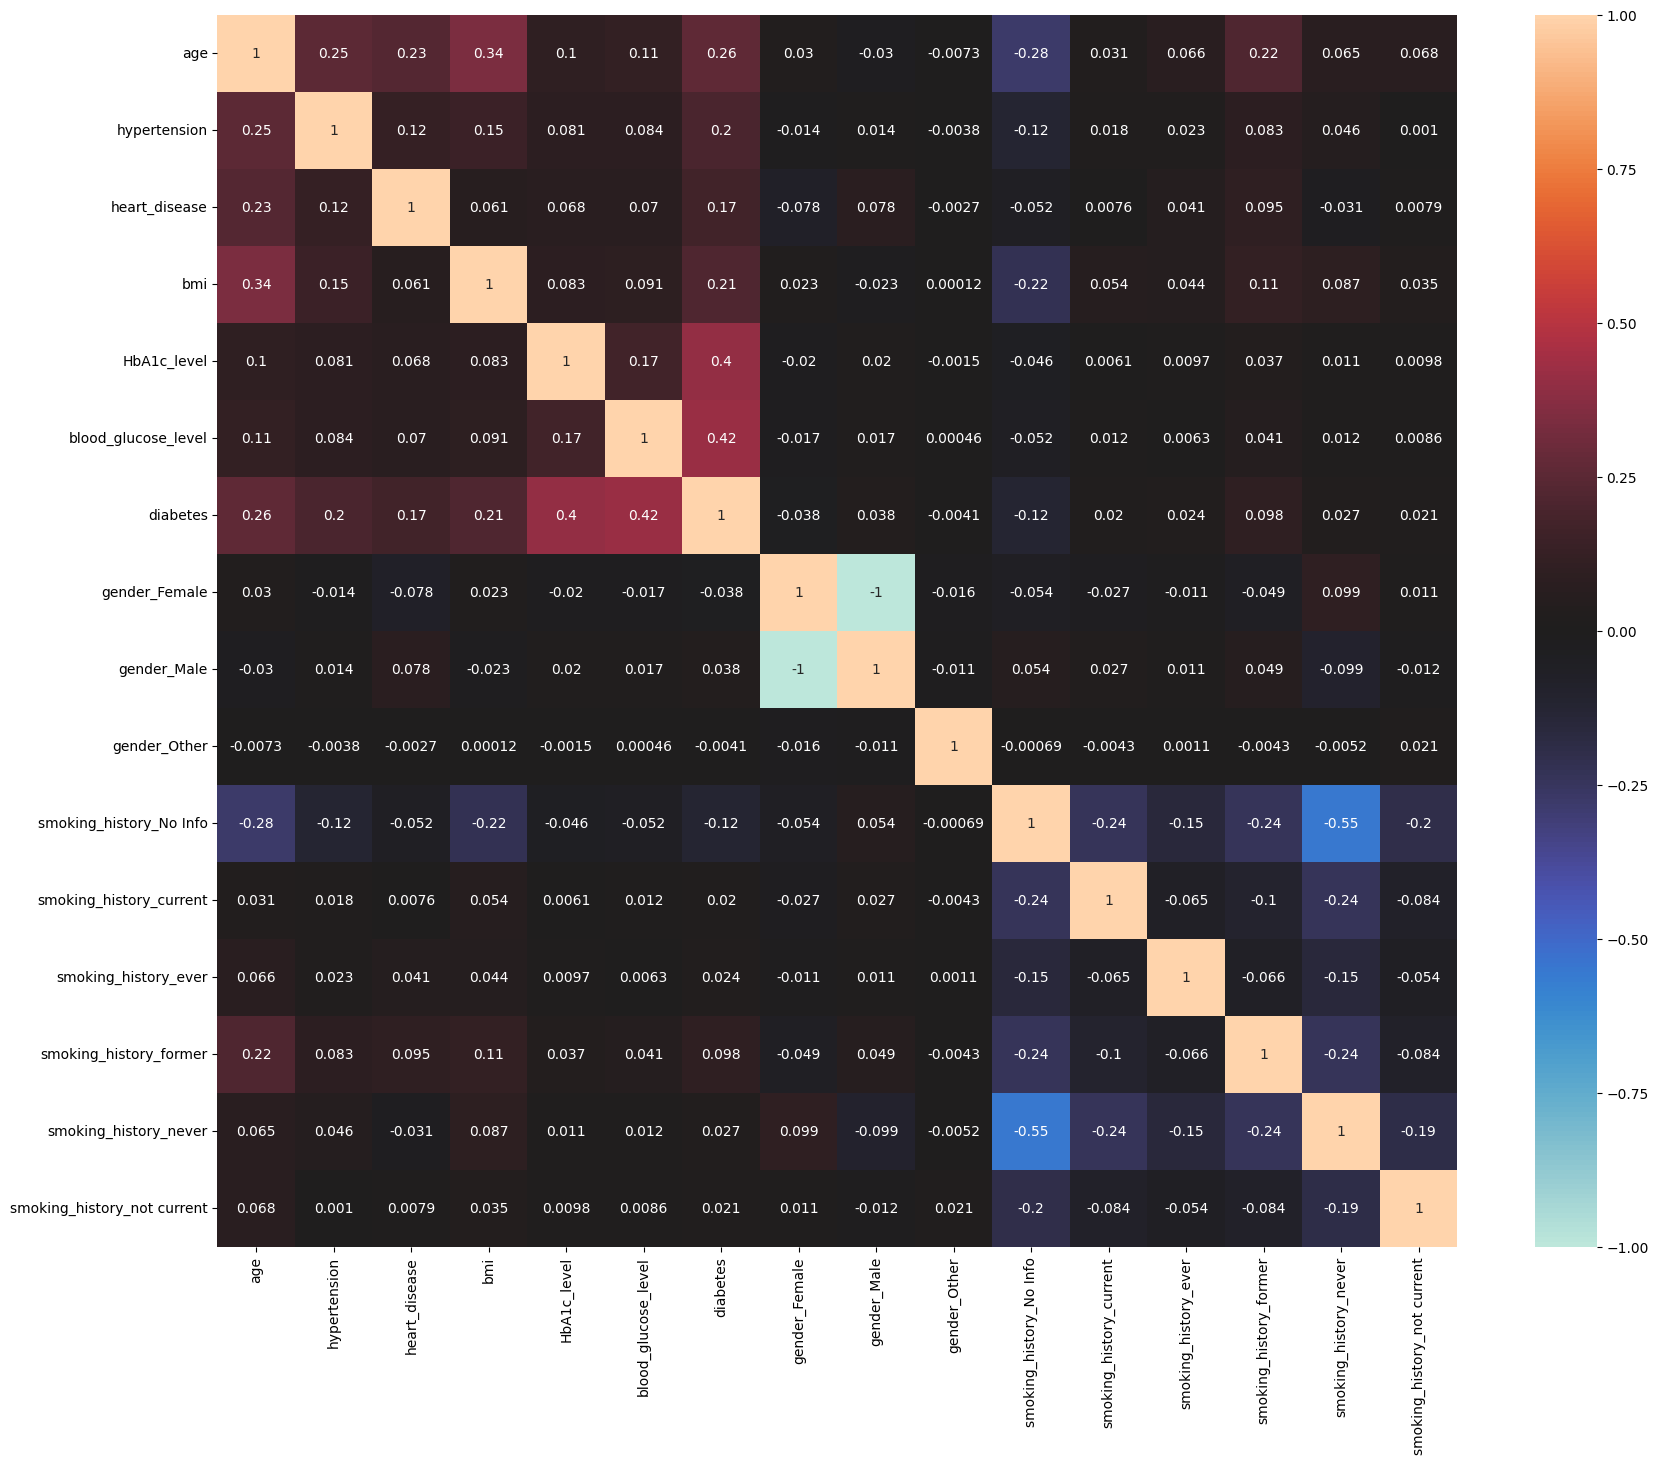

In [18]:
encoded_df = pd.get_dummies(df, columns=['gender','smoking_history'])
plt.figure(figsize=(20,16))
sns.heatmap(encoded_df.corr(), annot=True, vmin=-1, vmax=1, center=0)

In [ ]:
sns.pairplot(data=encoded_df, hue='diabetes', vars=['age', 'hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes','gender_Female','gender_Male','smoking_history_No Info','smoking_history_current','smoking_history_ever','smoking_history_former','smoking_history_never','smoking_history_not current' ], diag_kind='kde')

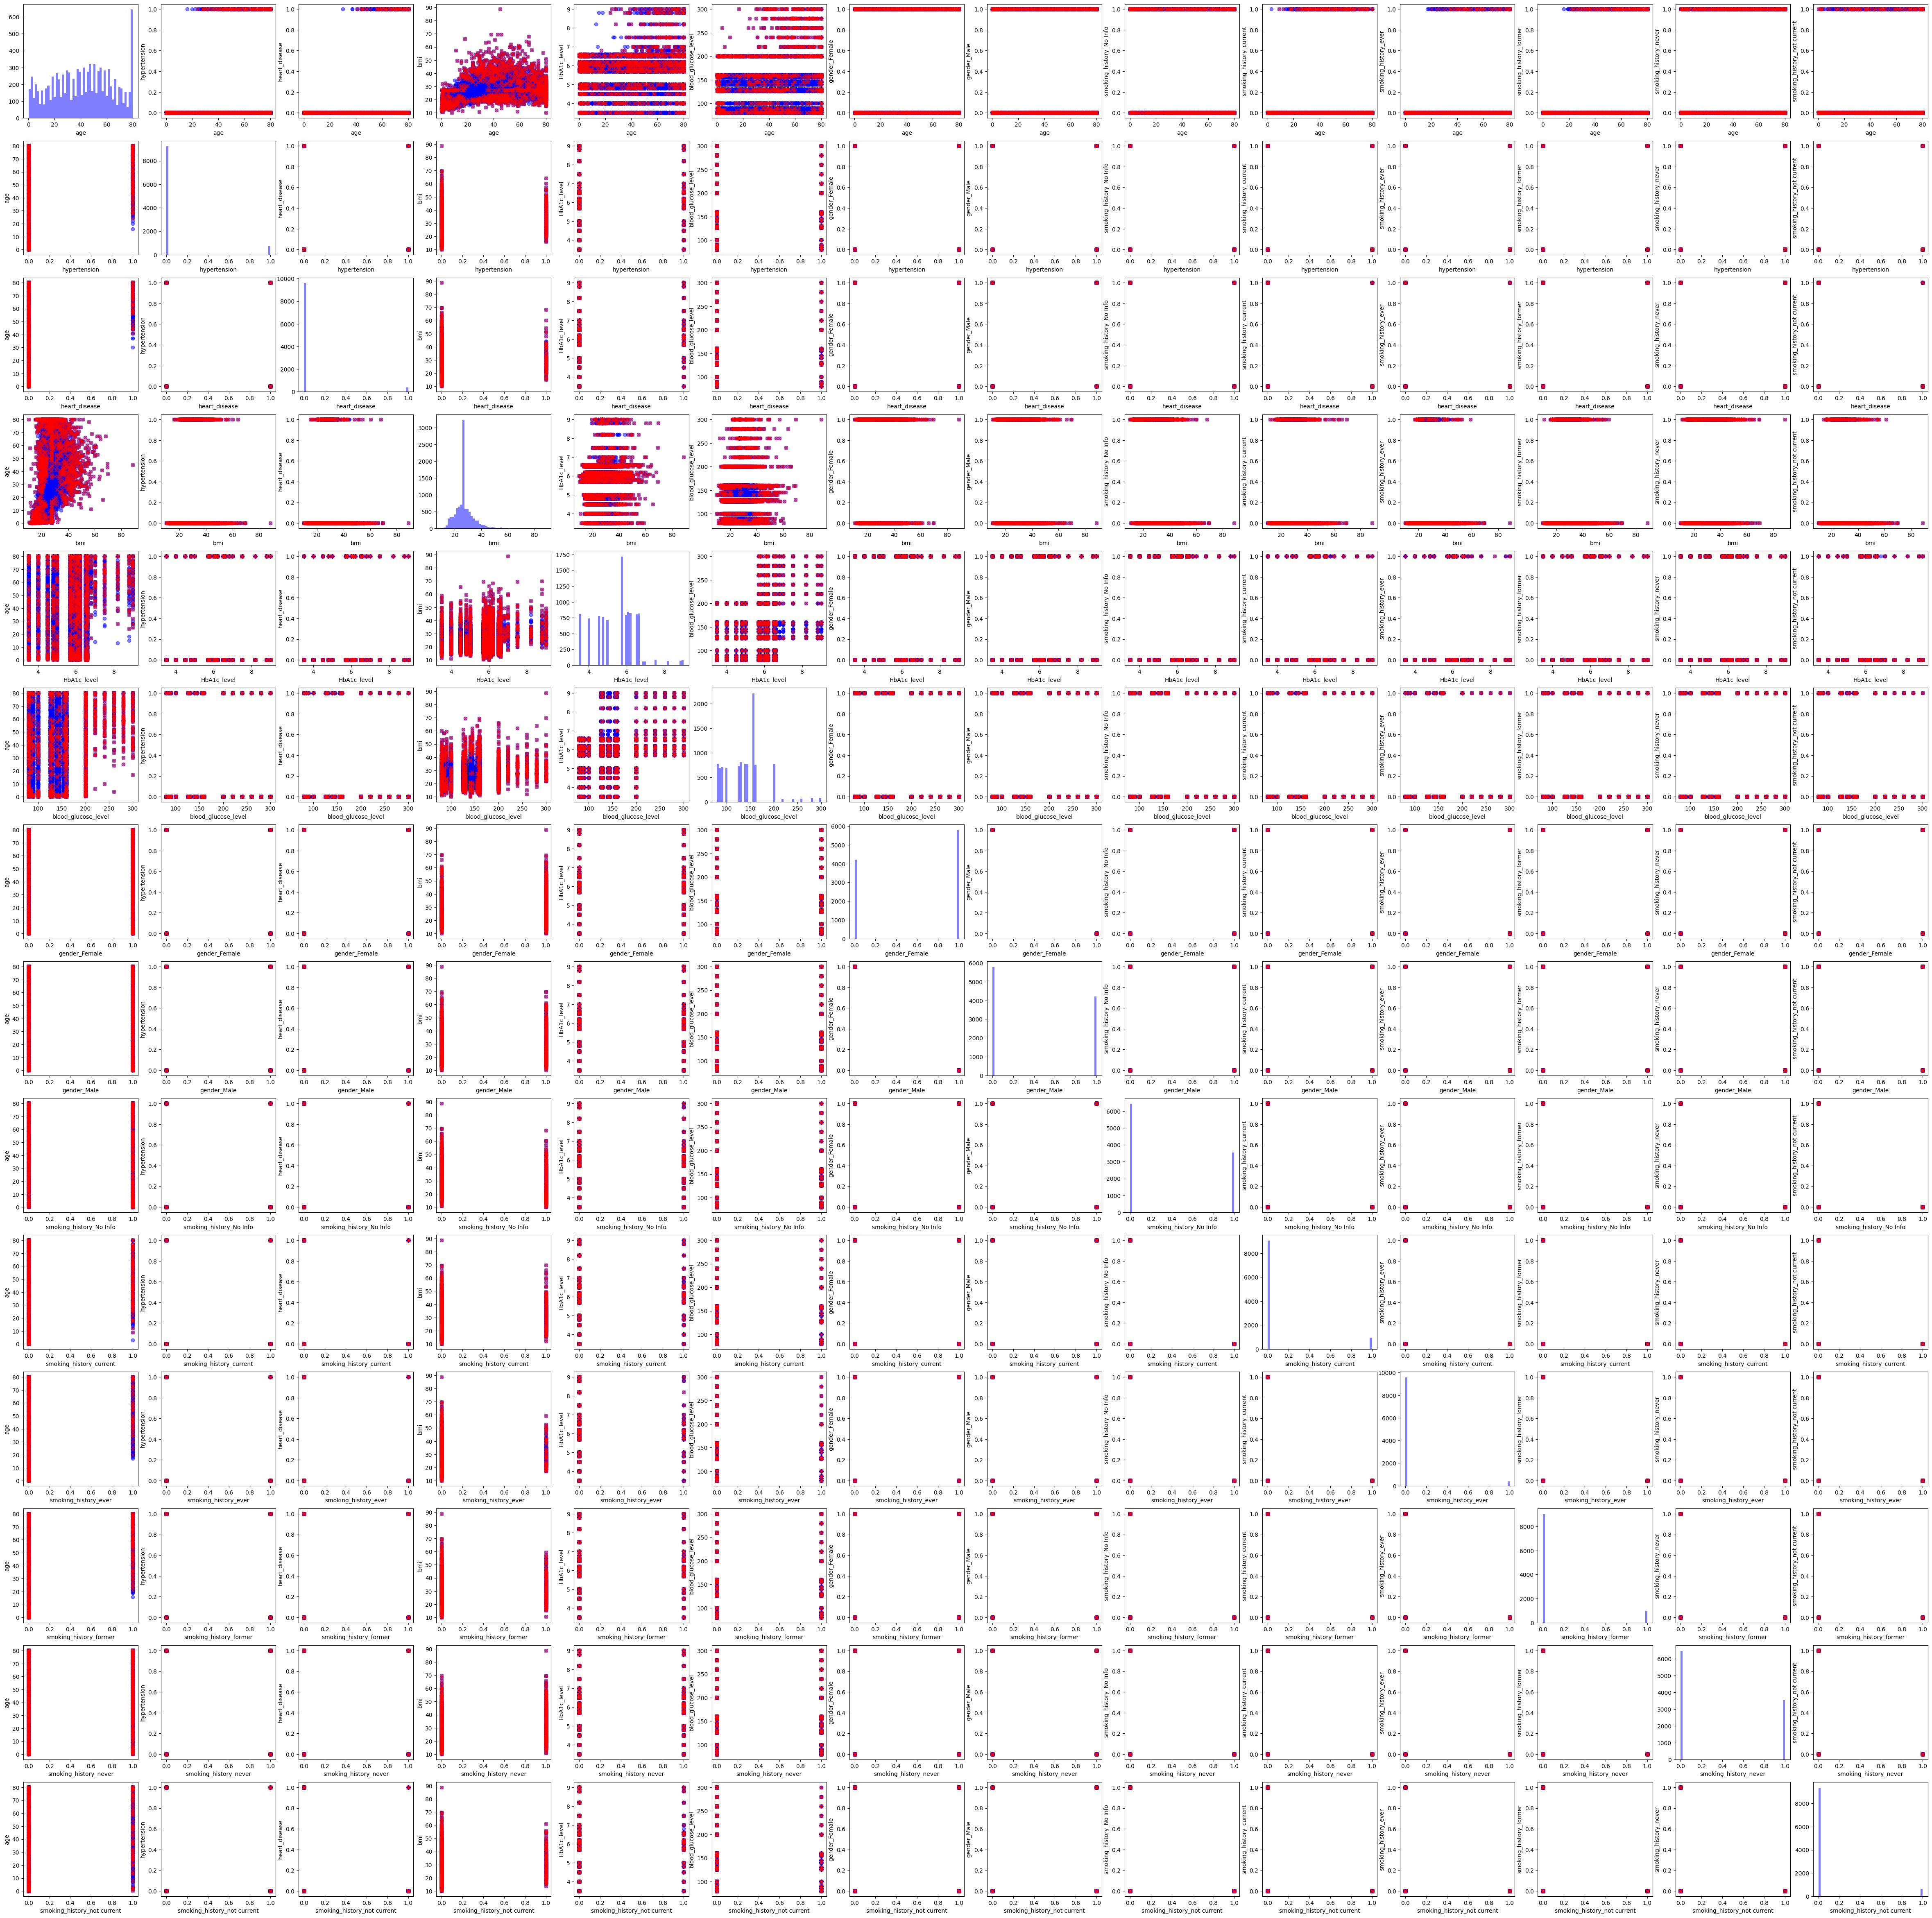

In [15]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

# Load your dataset or use your data preprocessing steps
# Assuming your dataset is in a DataFrame 'df'

# Select all columns except the target column (e.g., 'diabetes') for anomaly detection
Data = encoded_df.drop(columns=['diabetes'])
input_data = Data.to_numpy()

# Train the One-Class SVM
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.2)
svm.fit(input_data)

# Predict anomalies
pred = svm.predict(input_data)

# Find the indices of anomalies
anom_index = np.where(pred == -1)
anomalous_values = input_data[anom_index]

# Create a scatter plot to visualize anomalies
num_features = input_data.shape[1]

# Create a grid of subplots to visualize all pairs of features
fig, axes = plt.subplots(num_features, num_features, figsize=(60, 60))

for i in range(num_features):
    input_data[:, i] = input_data[:, i].astype(float)
    for j in range(num_features):
        if i == j:
            # Plot the feature's distribution on the diagonal
            axes[i, j].hist(input_data[:, i], bins=50, color='blue', alpha=0.5)
            axes[i, j].set_xlabel(Data.columns[i])
        else:
            # Plot feature pairs against each other
            axes[i, j].scatter(input_data[:, i], input_data[:, j], c='blue', alpha=0.5)
            axes[i, j].scatter(anomalous_values[:, i], anomalous_values[:, j], c='red', marker='x', label='Anomalies', alpha=0.7)
            axes[i, j].set_xlabel(Data.columns[i])
            axes[i, j].set_ylabel(Data.columns[j])

plt.show()
